In [4]:
import cv2
import numpy as np
import dlib

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

detector = dlib.get_frontal_face_detector()

In [5]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def face_detect(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Detect faces, see http://dlib.net/face_detector.py.html
    # 1 --> upsampling factor
    rects = detector(gray, 1)

    # Draw rectangle around each face
    result_dlib = np.copy(img)
    print('Number of detected faces:', len(rects))
    
    faces_dlib_img = []
    for rect in rects:    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 2)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])
        
    return result_dlib


Number of detected faces: 81


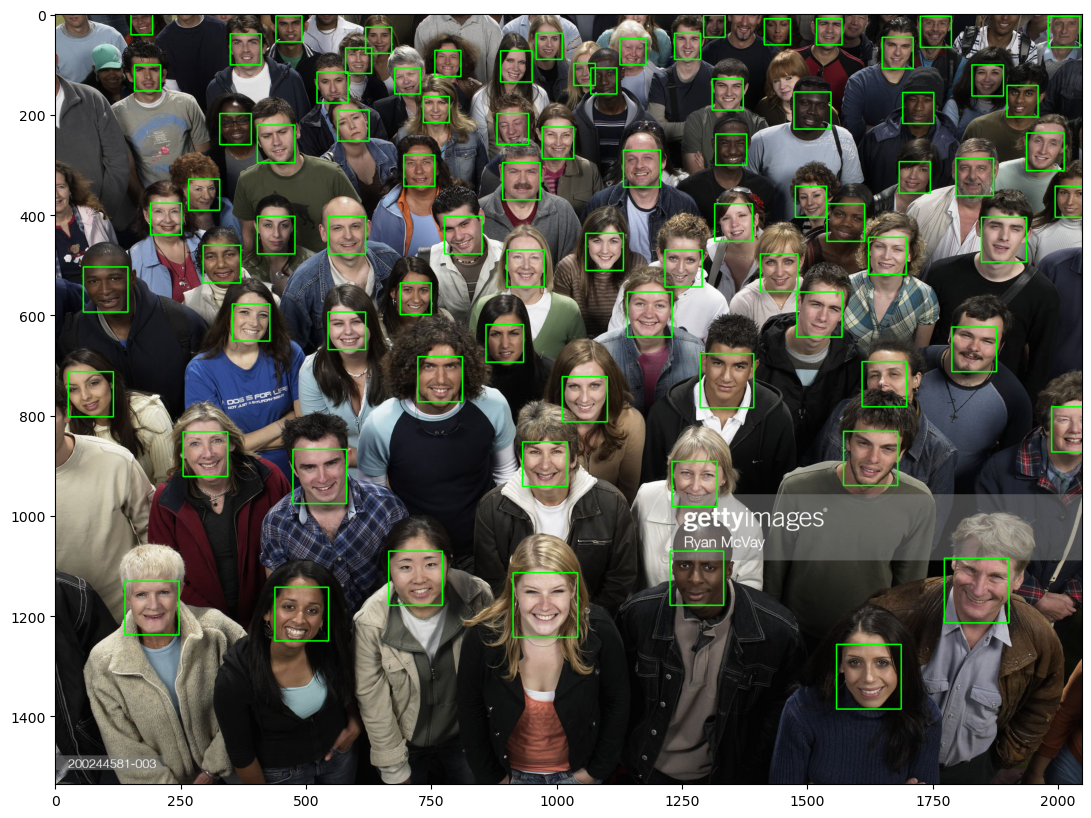

In [7]:
plt.imshow(face_detect('./data/peoples_1.jpg'))


Number of detected faces: 75


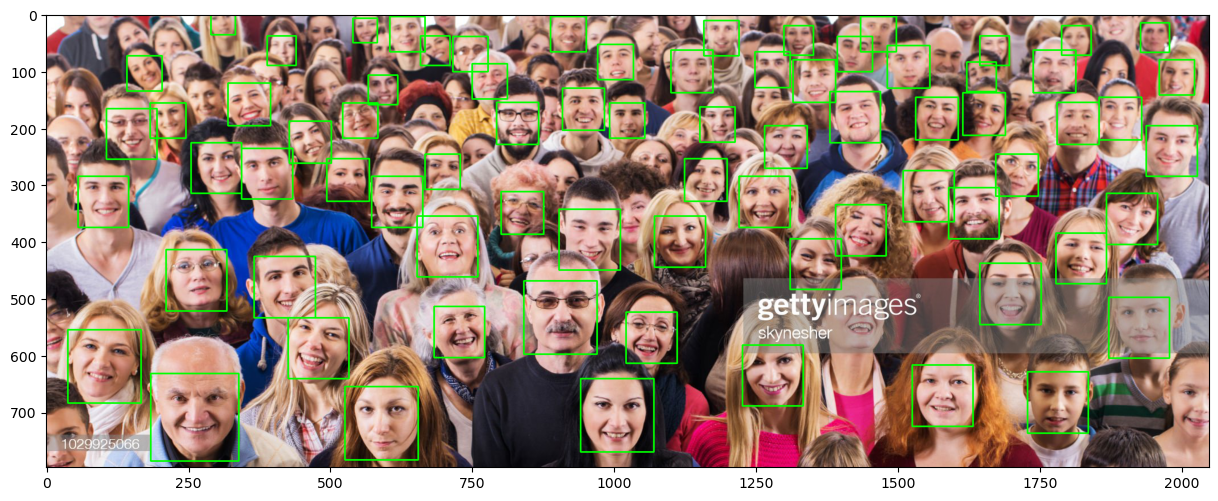

In [8]:
plt.imshow(face_detect('./data/peoples_2.jpg'))


Number of detected faces: 1


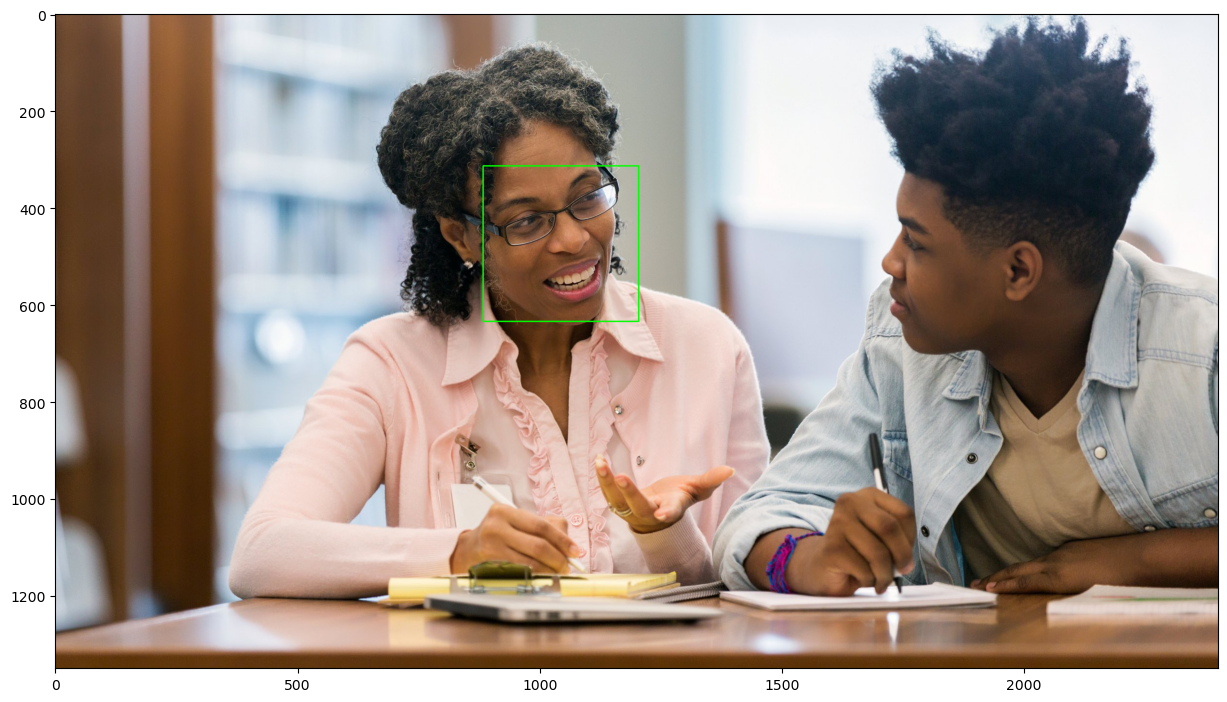

In [9]:
plt.imshow(face_detect('./data/peoples_3.jpg'))